## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocissing import RobustScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import six
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from autosklearn.classification import AutoSklearnClassifier

import tensorflow as tf

import pickle
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Read the data**

In [2]:
train = pd.read_csv("/content/drive/My Drive/AnalyticVidya/Jobathon/train.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
test = pd.read_csv("/content/drive/My Drive/AnalyticVidya/Jobathon/test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
print("Train data contains % 2d rows and % 2d columns" %(train.shape[0],train.shape[1]), "\n")
print("Test data contains {} rows and {} columns" .format(test.shape[0],test.shape[1]))

Train data contains  245725 rows and  11 columns 

Test data contains 105312 rows and 10 columns


### **Looking for Target Data using python**

In [4]:
for columns in train.columns:
  if columns not in test.columns:
    print("Column not present in the Test Data is: ", columns)

Column not present in the Test Data is:  Is_Lead


## **EDA**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,105312.0,4.387100e+01,14.872890,24.0,30.00,43.0,54.00,85.0
Vintage,105312.0,4.684282e+01,32.273634,7.0,20.00,32.0,73.00,135.0
Avg_Account_Balance,105312.0,1.134195e+06,866242.989426,22597.0,603982.25,896634.5,1371598.25,9908858.0


## **Merging the Train and Test Dataset**

In [4]:
labelData = train['Is_Lead']
trainNew = train.copy()
trainNew.drop(['Is_Lead'], axis=1,inplace=True)
df = pd.concat([trainNew.assign(ind="train"), test.assign(ind="test")])
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,ind
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,train
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,test
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,test
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,test
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,test


## **Identifying Numerical and Categorical Columns**

In [5]:
categoricalData = [column for column in df.columns if df[column].dtype == object ]
print("Categorical Columns in data are: ", categoricalData)

numericalData  = [column for column in df.columns if df[column].dtype != object]
print("Numerical Columns in data are: ", numericalData)

Categorical Columns in data are:  ['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'ind']
Numerical Columns in data are:  ['Age', 'Vintage', 'Avg_Account_Balance']


## **Visualizing the Data**

In [6]:
newCatData = categoricalData
newCatData.remove('ID')
newCatData.remove('ind')

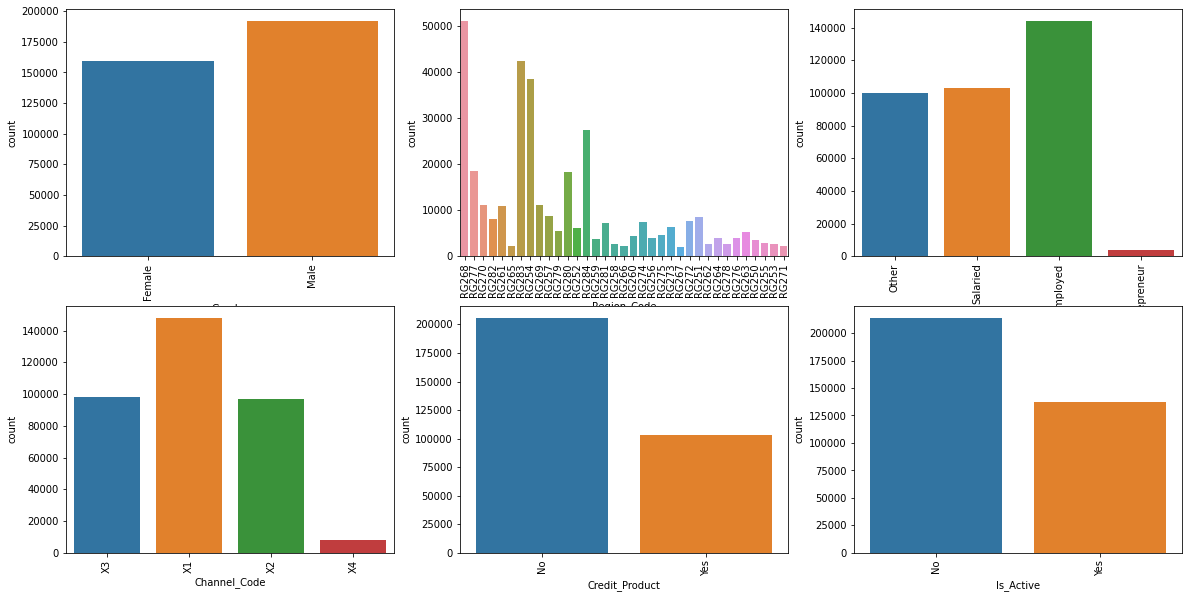

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for column, subplot in zip(newCatData, ax.flatten()):
  if (column == 'ID') | (column == 'ind'):
    continue
  else:
    sns.countplot(df[column], ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

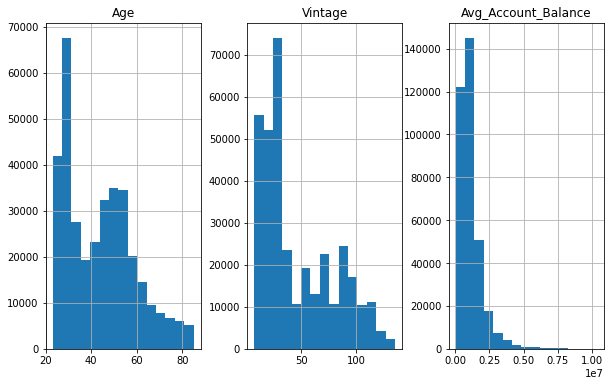

In [ ]:
df[numericalData].hist(bins=15, figsize=(10, 6), layout=(1, 3));

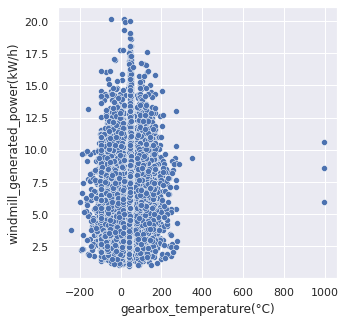

In [ ]:
sns.scatterplot(x='Avg_Account_Balance',y='IS_Lead',data=data_train)

In [ ]:
df.skew()

Age                    0.621864
Vintage                0.790512
Avg_Account_Balance    2.978170
dtype: float64

## **Data Preprocessing**

In [ ]:
df.duplicated().any()

False

In [ ]:
for column in numericalData:
  if(df[column] < 0).any():
    print("Negative Value present in column: ", column)
  else:
    print("No Negative Value present in column: ", column)

No Negative Value present in column:  Age
No Negative Value present in column:  Vintage
No Negative Value present in column:  Avg_Account_Balance


In [ ]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         41847
Avg_Account_Balance        0
Is_Active                  0
ind                        0
dtype: int64

In [ ]:
print("Train data missing value: ", train['Credit_Product'].isnull().sum())
print("Test data missing value:", test['Credit_Product'].isnull().sum())

Train data missing value:  29325
Test data missing value: 12522


In [7]:
df['Credit_Product'] = df['Credit_Product'].fillna('U')
df['Credit_Product'].isnull().sum()

0

In [9]:
for column in numericalData:
  Q1,Q3 = np.nanpercentile(df[column] , [25,75])
  IQR = Q3 - Q1
  cutOff = 1.5 * IQR
  lower_range = Q1 - cutOff
  upper_range = Q3 + cutOff
  print("Column is {} Q1 Value is {} Q3 value is {} lower bound is {} and upper bound is {}".format(column,Q1,Q3,lower_range,upper_range))

Column is Age Q1 Value is 30.0 Q3 value is 54.0 lower bound is -6.0 and upper bound is 90.0
Column is Vintage Q1 Value is 20.0 Q3 value is 73.0 lower bound is -59.5 and upper bound is 152.5
Column is Avg_Account_Balance Q1 Value is 604185.0 Q3 value is 1368152.0 lower bound is -541765.5 and upper bound is 2514102.5


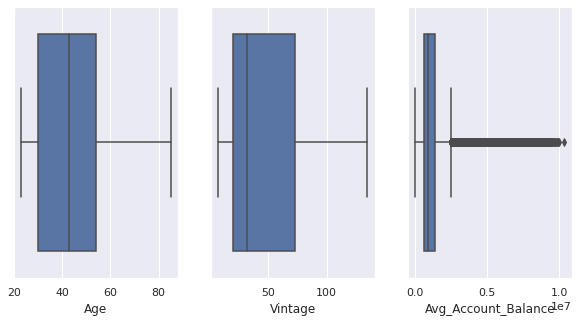

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for column, subplot in zip(numericalData, ax.flatten()):
  sns.boxplot(df[column], ax=subplot)

### **Z-score**

In [8]:
for column in numericalData:
  z_score_Count = df[(np.abs(stats.zscore(df[column])) > 3)].shape
  print("Column: ", column,"\t\t", "Z-score: ", z_score_Count)

Column:  Age 		 Z-score:  (0, 11)
Column:  Vintage 		 Z-score:  (0, 11)
Column:  Avg_Account_Balance 		 Z-score:  (7033, 11)


In [13]:
df.loc[(np.abs(stats.zscore(df['Avg_Account_Balance']))) > 3, ['Avg_Account_Balance']] = (604185 + 1368152)/2
print("Column: ", column, "Shape: ", df.loc[(np.abs(stats.zscore(df['Avg_Account_Balance']))) > 3].shape)

Column:  Avg_Account_Balance Shape:  (4569, 11)


### **Power Transform**

In [9]:
power = PowerTransformer(method='yeo-johnson', standardize=True) 
columnName = df['Avg_Account_Balance'].values.reshape(-1,1)
df['Avg_Account_Balance'] = power.fit_transform(columnName)

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,ind
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,0.238836,No,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,-0.728736,No,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,0.786146,Yes,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,-1.096857,No,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,-0.026628,No,train


### **Log function**

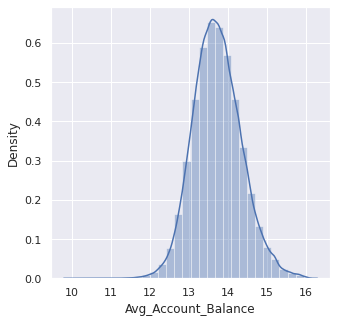

In [14]:
# Python log transform
df['Avg_Account_Balance'] = (np.log(df['Avg_Account_Balance']))
# print(np.sqrt(train['Avg_Account_Balance']))

sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(df['Avg_Account_Balance'], bins=30)
plt.show()

## **Categorical to Numeric**

In [8]:
newCatData.remove('Region_Code')

In [9]:
df = pd.get_dummies(df, columns=newCatData)
df.head(1)

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,ind,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_U,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,NNVBBKZB,73,RG268,43,1045696,train,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
df.shape

(351037, 21)

In [ ]:
#df.to_csv('cleanedMetaData.csv', header=True, index=False)

## **Spliting Train Data and Test Data CSV Files**

In [10]:
data_test, data_train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
data_train.drop(['ind'], axis=1, inplace=True)
data_train['Is_Lead'] = labelData
data_test.drop(['ind'], axis=1, inplace=True)
print('Train Data shape: ', data_train.shape)
print("Test Data shape: ", data_test.shape, "\n")

Train Data shape:  (245725, 21)
Test Data shape:  (105312, 20) 



In [ ]:
#data_train.to_csv('cleanedTrainData.csv', header=True, index=False)

## **Check Balanced or Unbalanced Data**

In [ ]:
data_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

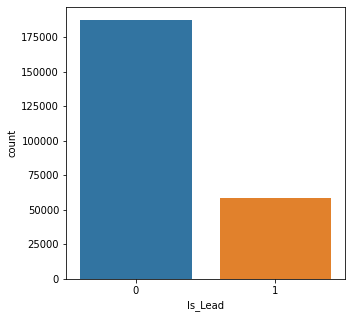

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data_train['Is_Lead'])

## **Resampling and Feature and Label Separation**

In [11]:
creditCardAccept = data_train[data_train['Is_Lead']==1]
creditCardReject = data_train[data_train['Is_Lead']==0]

In [12]:
print(creditCardAccept.shape)
print(creditCardReject.shape)

(58288, 21)
(187437, 21)


In [13]:
creditCardReject = creditCardReject.sample(creditCardAccept.shape[0])
creditCardReject.shape

(58288, 21)

In [14]:
data = creditCardAccept.append(creditCardReject, ignore_index=True)
data

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_U,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Is_Lead
0,ETQCZFEJ,62,RG282,20,1056750,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1
1,UJ2NJKKL,33,RG268,69,517063,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1
2,CNGSPYWS,46,RG268,97,2282502,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1
3,VH7NBNNQ,59,RG283,15,2384692,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1
4,7PMYNWB3,44,RG269,19,1001650,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116571,ELRIWKDM,58,RG276,38,624317,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
116572,QS2ABMVV,30,RG261,31,731161,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
116573,RP2OMGTF,84,RG254,69,806108,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
116574,9RFK8PFD,51,RG254,50,4415841,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
# selectedFeature = data.drop(['Avg_Account_Balance', 'Gender_Female', 'Gender_Male',
#        'Region_Code_RG250', 'Region_Code_RG251', 'Region_Code_RG252',
#        'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255',
#        'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
#        'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
#        'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
#        'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
#        'Region_Code_RG269', 'Region_Code_RG270', 'Region_Code_RG271',
#        'Region_Code_RG272', 'Region_Code_RG273',
#        'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276',
#        'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279',
#        'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
#        'Region_Code_RG283', 'Region_Code_RG284'], axis=1)

# selectedFeature.columns

Index(['ID', 'Age', 'Vintage', 'Region_Code_RG268', 'Occupation_Entrepreneur',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Is_Lead'],
      dtype='object')

In [15]:
features = data.drop(['ID',"Is_Lead",'Region_Code','Avg_Account_Balance'], axis=1).values
label = data['Is_Lead'].values

## **Feature Engineering**

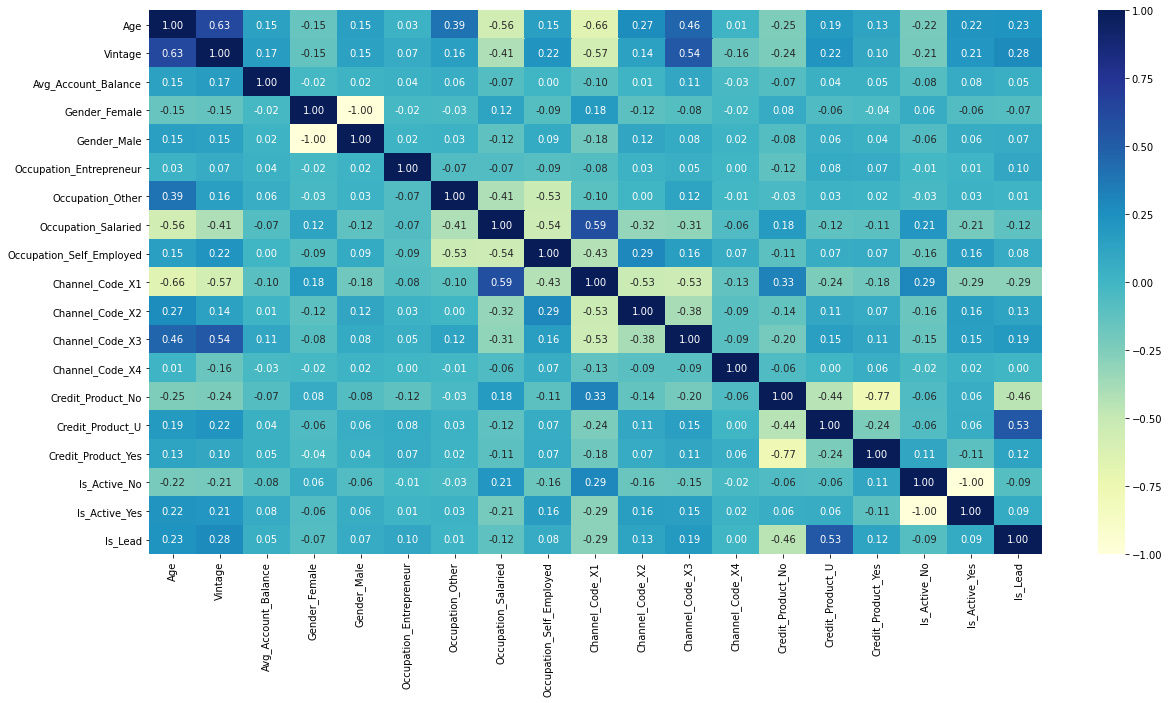

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_train.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

In [ ]:
modelLR = RandomForestClassifier()
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,step=1)
selectFeaturesFromRFE.fit(features,label)
print(selectFeaturesFromRFE.ranking_)

[ 1  1  1  8  3  9  6  1  7  1  5  2 10  1  1  1  4  1]


In [ ]:
modelLR = LogisticRegression()
from sklearn.feature_selection import SelectFromModel
selectFeaturesFromSFM = SelectFromModel(modelLR)
selectFeaturesFromSFM.fit(features,label)
print(selectFeaturesFromSFM.get_support())

[False False  True False False False False False False False False False
 False False False False False False]


## **Train Test Split from Train Data CSV**

In [16]:
seed = 32
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)

## **Scaling the Training data**

In [17]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Applying PCA**

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## **Handling Imbalanced Data**

### **SMOTE**

In [ ]:
print("Count of 1 class in training set before upsampling :" ,(sum(y_train==1)))
print("Count of 0 class in training set before upsampling :",(sum(y_train==0)))

Count of 1 class in training set before upsampling : 46527
Count of 0 class in training set before upsampling : 150053


In [ ]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=32) 

In [ ]:
X_train_new, y_train_new = smote.fit_sample(X_train, y_train.ravel())

In [ ]:
print("Count of 1 class in training set after upsampling  :" ,(sum(y_train_new==1)))
print("Count of 0 class in training set after upsampling  :",(sum(y_train_new==0)))

Count of 1 class in training set after upsampling  : 150053
Count of 0 class in training set after upsampling  : 150053


In [ ]:
y_test.ravel()

array([0, 1, 0, ..., 1, 0, 0])

### **Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=33, replacement=True)
X_res, y_res = rus.fit_resample(X_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 149946, 1: 46634})
Resampled dataset shape Counter({0: 46634, 1: 46634})


## **Model Building**

### **Logistic Regression**

In [ ]:
lr = LogisticRegression()
modelLR = lr.fit(X_train_new,y_train_new)
print(modelLR.score(X_train_new,y_train_new))
print(modelLR.score(X_test,y_test))

print(modelLR.predict_proba(X_test)[:,1])

0.5
0.23713500864787873
[0.5132413  0.50670663 0.50697032 ... 0.51248793 0.50625113 0.52813644]


0.5522332453204477


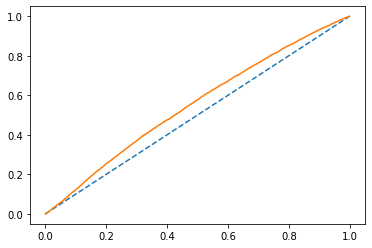

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelLR.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,modelLR.predict(X_test))

array([[    0, 37491],
       [    0, 11654]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     36656
           1       0.15      1.00      0.27      6624

    accuracy                           0.15     43280
   macro avg       0.08      0.50      0.13     43280
weighted avg       0.02      0.15      0.04     43280



### **KNN**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(X_train,y_train)
print("Training score is: ", modelKNN.score(X_train,y_train))
print("Testing score is: ", modelKNN.score(X_test,y_test))

Training score is:  0.8255736650225177
Testing score is:  0.7823383084577115


0.8420656521496611


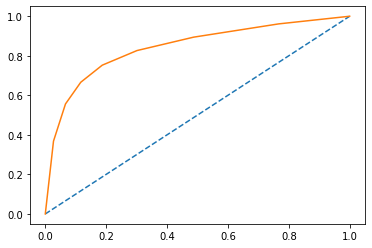

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelKNN.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [ ]:
# 1-> 0 (Not Tolerable)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,modelKNN.predict(X_test))

array([[23890, 12766],
       [ 3811,  2813]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74     36656
           1       0.18      0.42      0.25      6624

    accuracy                           0.62     43280
   macro avg       0.52      0.54      0.50     43280
weighted avg       0.76      0.62      0.67     43280



### **XGBRFClassifier**

In [18]:
xgb = XGBRFClassifier()
modelXGB = xgb.fit(X_train,y_train)

train_score = modelXGB.score(X_train,y_train)
test_score = modelXGB.score(X_test,y_test)
print("Test : {} Train: {}".format(test_score,train_score))

Test : 0.7927603362497856 Train: 0.7915397812567017


Feature: 0, Score: 0.05885
Feature: 1, Score: 0.03121
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00218
Feature: 5, Score: 0.01024
Feature: 6, Score: 0.00261
Feature: 7, Score: 0.08706
Feature: 8, Score: 0.00200
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.64210
Feature: 12, Score: 0.15120
Feature: 13, Score: 0.01254
Feature: 14, Score: 0.00000


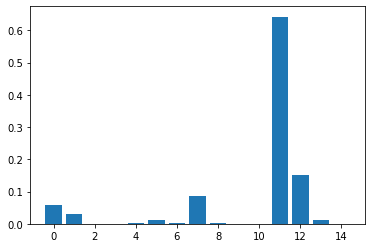

In [ ]:
# get importance
importance = modelXGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.8625818863693662


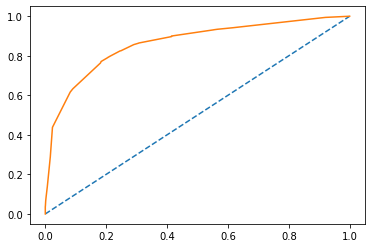

In [19]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelXGB.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

### **Using Pipeline**

In [ ]:
def ModelTypes():
  modelType = []
  modelType.append(('LogisticRegression', LogisticRegression()))
  modelType.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
  modelType.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000)))
  modelType.append(('DecisionTree', DecisionTreeClassifier()))
  modelType.append(('RandomForest', RandomForestClassifier()))
  modelType.append(('XGBRF', XGBRFClassifier(n_jobs=-1)))
  modelType.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=32,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)))
  modelType.append(('XGBClassifier', XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)))
  
  return modelType

In [ ]:
def ModelBuilding(X_train, y_train, models):
  num_folds = 10
  scoring = 'accuracy'
  SEED = 33
  modelScoreDict = {}
  for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    modelScoreDict[name] = cv_results
    scores = "{}: {} ({})" .format(name, cv_results.mean(), cv_results.std())
    print(scores)

  return modelScoreDict

In [ ]:
%%time
models = ModelTypes()
modelScoreDict = ModelBuilding(X_train, y_train, models)

LogisticRegression: 0.7870147973407677 (0.004228896267500209)
KNN: 0.7372721423975981 (0.004597730303150523)
ExtraTreesClassifier: 0.7941882907999143 (0.002807712671414851)
DecisionTree: 0.7144006004717993 (0.003988574538805044)
RandomForest: 0.7725069697619558 (0.004055736867889649)
XGBRF: 0.788923439845593 (0.00412043790537922)
GradientBoostingRegressor: 0.8013081707055543 (0.003073885294975927)
XGBRegressor: 0.8012223890199441 (0.0030972861220424546)
CPU times: user 28min 59s, sys: 26.5 s, total: 29min 25s
Wall time: 38min 2s


In [ ]:
gbr = GradientBoostingClassifier(random_state=32,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)
et = ExtraTreesClassifier(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000)
xgb = XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)

In [ ]:
%%time
from sklearn.metrics import accuracy_score
modelFinal = VotingClassifier([('gbr', gbr),('xgb',xgb),('et', et)])

modelFinal.fit(X_train, y_train)
y_pred = modelFinal.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %.3f" % score)

Hard Voting Score 0.803
CPU times: user 3min 45s, sys: 9.28 s, total: 3min 54s
Wall time: 4min 19s


In [ ]:
# for clf, label in zip([gbr, xgb, et, modelFinal], ['GradientBoostClassifier', 'XGBClassifier', 'ExtraTreeClassifier', 'Ensemble']):
#   scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
#   print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

### **GradientBoost Classifier**

In [20]:
GBC = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=32, max_features=7)
modelXGBNew = GBC.fit(X_train,y_train)

train_score = modelXGBNew.score(X_train,y_train)
test_score = modelXGBNew.score(X_test,y_test)
print("Test : {} Train: {}".format(test_score,train_score))

Test : 0.8068279293189227 Train: 0.8088355136178426


### **Hyperparameter Tuning**

In [33]:
learning_rate = [.001,.01,1]
n_estimators = range(20,81,10)
max_depth = range(5,16,2)
min_samples_split = range(1000,2500,200)
subsample= [0.85]
random_state= [32]
max_features = range(7,20,2)

paramGrid = dict(learning_rate=learning_rate,  n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split,
                 subsample= subsample, random_state=random_state, max_features=max_features)

modelGBC = GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(modelGBC,
                   param_grid=paramGrid,
                   cv = 5) #Same as cross_val_score

In [ ]:
%%time

grid.fit(X_train,y_train)

In [ ]:
grid.best_score_

AttributeError: ignored

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

### **DNN**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPCModel = MLPC.fit(X_train, y_train)
y_pred = MLPCModel.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc 

0.6451722382487697

### **Tensorflow Keras**

In [ ]:
seed = 32

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
# Architect the model
model = tf.keras.models.Sequential()
# using units = 3*4 
# input shape = 4
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 1024, activation= 'relu',input_dim = 17))
model.add(tf.keras.layers.Dense( units = 256, activation= 'relu'))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 128, activation= 'relu'))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 64, activation= 'relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 32, activation= 'relu'))
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

# Compile model
model.compile(#optimizer = "Adam" , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(MyThresholdCallback, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
            self.model.stop_training = True
            

myScoreMonitor = MyThresholdCallback(cl=0.8)

epoch_hist = model.fit(X_train_new,
                       y_train_new,
                       epochs=50,
                       validation_data=(X_test,y_test),
                       callbacks= [myScoreMonitor] )

In [ ]:
plt.plot(epoch_hist.history['accuracy'])
plt.plot(epoch_hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy' ])

## **Predicting Data**

In [22]:
featuresTest = data_test.drop(['ID', 'Region_Code','Avg_Account_Balance'], axis=1).values

In [23]:
featuresTest = scaler.fit_transform(featuresTest)

In [24]:
predValue = modelXGBNew.predict(featuresTest)

In [25]:
print("The length of the predicted vlue is: {}".format(len(predValue)), "\n")
print(predValue)

The length of the predicted vlue is: 105312 

[0 1 0 ... 0 0 0]


In [26]:
finalDataFrame = test.loc[:,['ID']]
finalDataFrame['Is_Lead'] = predValue 

In [27]:
finalDataFrame

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [28]:
finalDataFrame.to_csv('/content/drive/My Drive/AnalyticVidya/Jobathon/predictionData3.csv', header=True, index=False)